<a href="https://colab.research.google.com/github/oceam/agri-image/blob/main/codes/Googlecolab_fundamentals_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Googlecolab_fundamentals_5

Extract plant(green) from Image

Wei Guo  
2022.08.25


## Prepare the data

In [ ]:
import gdown
# Download the data you pre-procssed  
#https://drive.google.com/file/d/1grhJZR1bjsyOwvHCa-2NQ8iwnOfQJyyA/view?usp=sharing
url = "https://drive.google.com/file/d/1tubZ1K5Ku-lv3kieo68PnxjmOSkFAwNn/view?usp=sharing"
output3= "soybean_s_c.zip"
gdown.download(url=url, output=output3, quiet=False, fuzzy=True)

In [2]:
# unzip image
!unzip soybean_s_c.zip  

Archive:  soybean_s_c.zip
   creating: content/soybean_s_c/
  inflating: content/soybean_s_c/C5_116_c.JPG  
  inflating: content/soybean_s_c/C5_126_c.JPG  
  inflating: content/soybean_s_c/C5_086_c.JPG  
  inflating: content/soybean_s_c/C5_096_c.JPG  
  inflating: content/soybean_s_c/C5_136_c.JPG  
  inflating: content/soybean_s_c/C5_106_c.JPG  


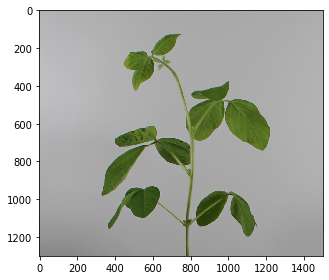

In [9]:
from skimage import io
import os
imgname= os.path.join('content/soybean_s_c', 'C5_086_c.JPG')
I=io.imread(imgname)
io.imshow(I)

## Segmentation use color index values


In the paper of "[Verification of color vegetation indices for automated crop imaging applications](https://doi.org/10.1016/j.compag.2008.03.009)
", Meyer proposed three index calculated from RGB values: `NDI`, `ExG`, and `ExR`

![](https://www.dropbox.com/s/4dyiju0vg0bnmkz/colab_20210629173055.png?dl=1)

By using three values, it strength the differences between leaves and backgrounds.

Meanwhile, instead of manual given a value (e.g. 100 in previous cases, it used an automatic method: Otsu Threshold)

<p><a href="https://commons.wikimedia.org/wiki/File:Otsu%27s_Method_Visualization.gif#/media/File:Otsu's_Method_Visualization.gif"><img src="https://upload.wikimedia.org/wikipedia/commons/3/34/Otsu%27s_Method_Visualization.gif" alt="Otsu's Method Visualization.gif"></a></p>

Let us recurrent this experiment:


**Show the strength results like paper**


In [10]:
import numpy as np
img = I.astype(np.float32)
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]
ExG = 2 * G - R - B
ExR = 1.4 * R - G

In [11]:
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

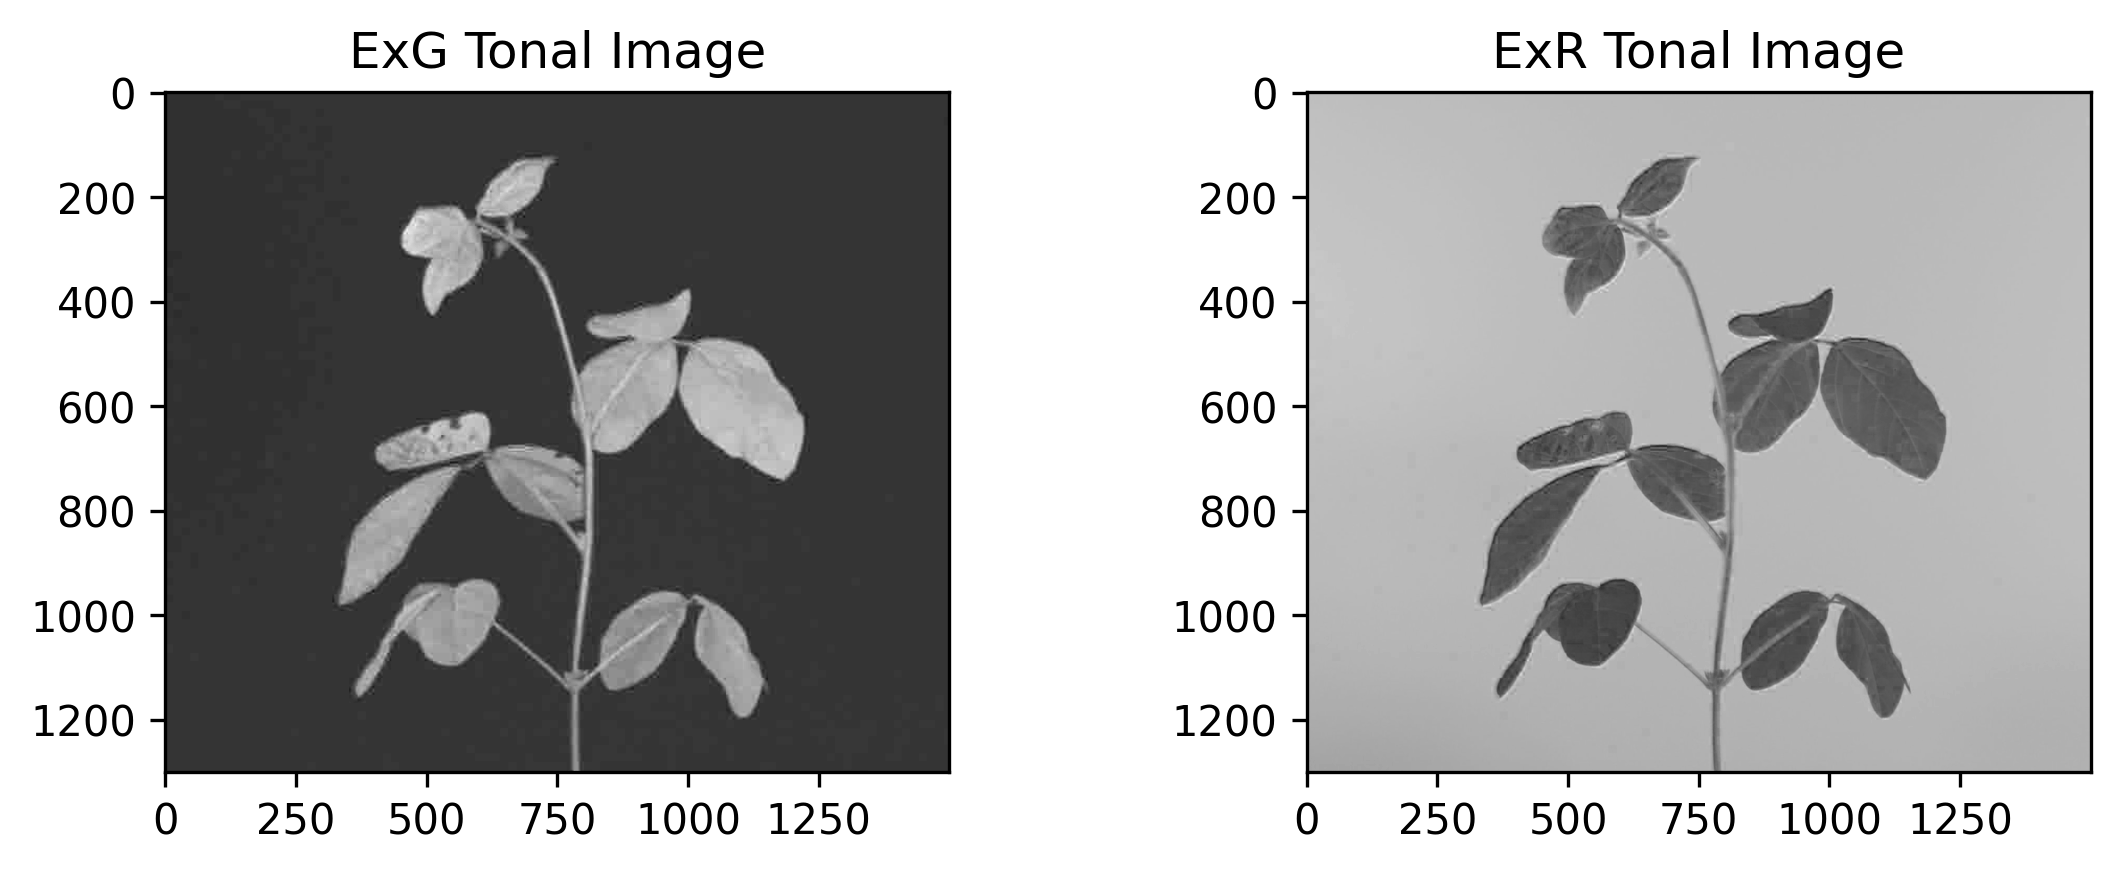

In [8]:

fig, ax = plt.subplots(1, 2, figsize=(9, 3), dpi=300)
ax[0].set_title("ExG Tonal Image")
ax[0].imshow(ExG, cmap="gray")

ax[1].set_title("ExR Tonal Image")
ax[1].imshow(ExR, cmap="gray")

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'ExG + Otsu')

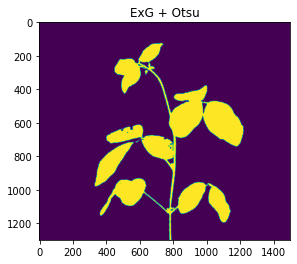

In [12]:
thresh = threshold_otsu(ExG)
bin_img_1 = ExG>thresh
bin_img=bin_img_1.astype(np.int)
bin_img.shape
plt.imshow(bin_img)
plt.title(f"ExG + Otsu")

In [14]:
bin_img_1[1:5,1:5]

array([[False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False]])

In [15]:
bin_img[1:5,1:5]

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

fomular from paper

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'ExG -ExR')

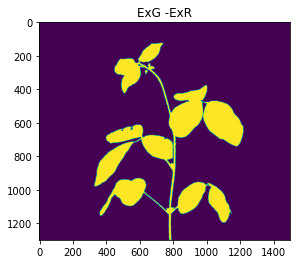

In [18]:
ex_GR1 = ExG - ExR
thresh = 0
bin_img_1 = ex_GR1>thresh
bin_img=bin_img_1.astype(np.int)
bin_img.shape
plt.imshow(bin_img)
plt.title(f"ExG -ExR")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'ROI')

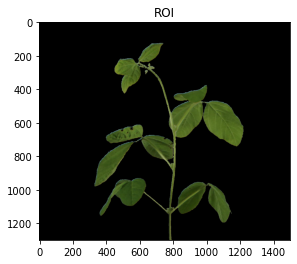

In [19]:
rgbimg = I.astype(np.int)
rgbimg[:, :, 0] = rgbimg[:, :, 0]*bin_img
rgbimg[:, :, 1] = rgbimg[:, :, 1]*bin_img
rgbimg[:, :, 2] = rgbimg[:, :, 2]*bin_img
plt.imshow(rgbimg)
plt.title(f"ROI")

## Run whole folder

In [20]:
img_list = io.imread_collection("content/soybean_s_c/*.JPG")
img_list.files

['content/soybean_s_c/C5_086_c.JPG',
 'content/soybean_s_c/C5_096_c.JPG',
 'content/soybean_s_c/C5_106_c.JPG',
 'content/soybean_s_c/C5_116_c.JPG',
 'content/soybean_s_c/C5_126_c.JPG',
 'content/soybean_s_c/C5_136_c.JPG']

Define save path

In [21]:
savepath = 'soybean_s_c_seg/'
# Check whether the specified path exists or not
isExist = os.path.exists(savepath)
if not isExist:
  # Create a new directory because it does not exist 
  os.makedirs(savepath)
  print('Created path for save')

Created path for save


In [22]:
im_seg_list=[]
for imgname in img_list.files:    
    I = io.imread(imgname)
    img = I.astype(np.float32)
    R = img[:, :, 0]
    G = img[:, :, 1]
    B = img[:, :, 2]
    ExG = 2 * G - R - B
    ExR = 1.4 * R - G
    ex_GR1 = ExG - ExR
    thresh = 0
    bin_img_1 = ex_GR1>thresh
    bin_img=bin_img_1.astype(np.int)
    rgbimg = I.astype(np.int)
    rgbimg[:, :, 0] = rgbimg[:, :, 0]*bin_img
    rgbimg[:, :, 1] = rgbimg[:, :, 1]*bin_img
    rgbimg[:, :, 2] = rgbimg[:, :, 2]*bin_img
    im_seg_list.append(rgbimg)
    c_imgname=savepath+imgname[20:-4]+'_seg.JPG'
    io.imsave(c_imgname,rgbimg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional inf

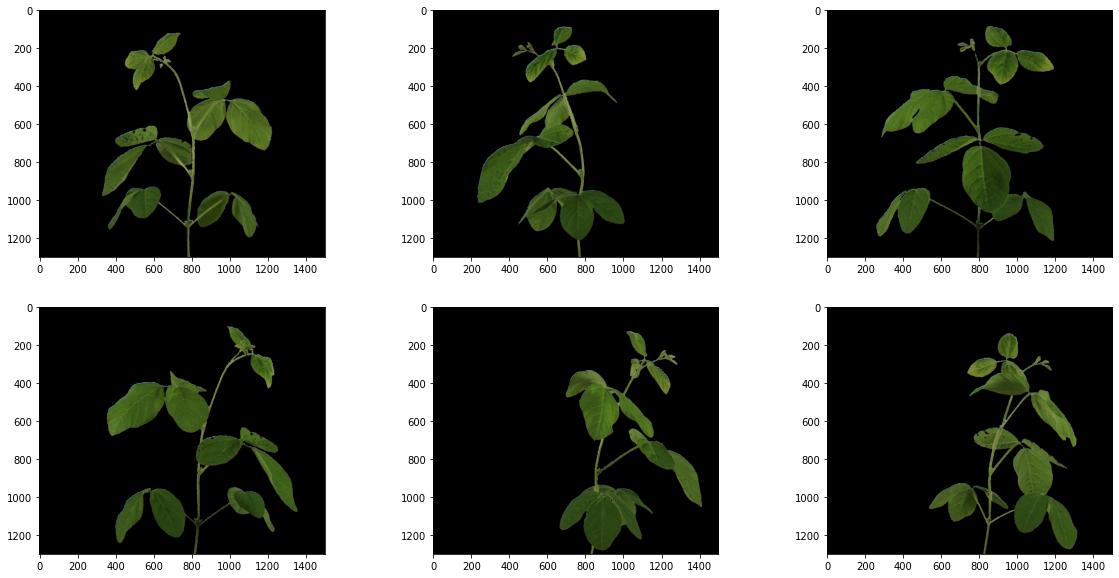

In [23]:
fig = io.imshow_collection(im_seg_list);
fig.set_figwidth(20)
fig.set_figheight(10)

In [24]:
!zip -r /content/soybean_s_c_seg.zip /content/soybean_s_c_seg 

  adding: content/soybean_s_c_seg/ (stored 0%)
  adding: content/soybean_s_c_seg/C5_086_c_seg.JPG (deflated 31%)
  adding: content/soybean_s_c_seg/C5_116_c_seg.JPG (deflated 30%)
  adding: content/soybean_s_c_seg/C5_096_c_seg.JPG (deflated 34%)
  adding: content/soybean_s_c_seg/C5_106_c_seg.JPG (deflated 28%)
  adding: content/soybean_s_c_seg/C5_126_c_seg.JPG (deflated 33%)
  adding: content/soybean_s_c_seg/C5_136_c_seg.JPG (deflated 31%)


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
# copy to google drive to save
import shutil
shutil.copyfile('/content/soybean_s_c_seg.zip', '/content/drive/MyDrive/uktest/soybean_s_c_seg.zip')

'/content/drive/MyDrive/uktest/soybean_s_c_seg.zip'